In [18]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
#hep.style.use("CMS")
from matplotlib import colors, ticker
import pickle as pkl
from unfold_utils.integrate_and_rebin import *
from unfold_utils.merge_helpers import *

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
lauren = True
# with open('latest_pkl/0508/all_lauren_bin_mc.pkl', "rb") as f:
#     output_pythia= pkl.load( f )

    
# with open("latest_pkl/0508/data_0508_full.pkl", "rb") as f:
#     output_data = pkl.load( f )


with open('latest_pkl/lauren_mc.pkl', "rb") as f:
    output_pythia= pkl.load( f )

    
with open("latest_pkl/lauren_data.pkl", "rb") as f:
    output_data = pkl.load( f )

groomed = False
if not groomed:


    edges = [ 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 250, 300, 800, 1300]
    edges_gen = [20, 40, 60, 80, 100, 150, 200, 300, 1300]
if groomed:

    edges = [0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 250, 300, 800, 1300]
    edges_gen = [0, 10, 20, 40, 60, 80, 100, 150, 200, 300, 1300]


if not groomed:
    resp_matrix_4d = output_pythia['response_matrix_u']

    input_data = output_data['ptreco_mreco_u']

    # fakes = output_pythia['fakes_u']
    # misses = output_miss['misses_u']
    # hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    # resp_matrix_pythia = resp_matrix_4d
    # resp_matrix_4d_herwig  = output_herwig['response_matrix_u'][{'systematic':['herwig']}]
    # fakes_herwig = output_herwig['fakes_u']
    # misses_herwig = output_herwig['misses_u']
else:
    resp_matrix_4d = output_pythia['response_matrix_g']

    input_data = output_data['ptreco_mreco_g']

    # fakes = output_pythia['fakes_g']
    # misses = output_miss['misses_g']
    # hist_bg = output_bg['response_matrix_u'].project('dataset','ptreco','mreco')
    # resp_matrix_pythia = resp_matrix_4d
    # resp_matrix_4d_herwig = output_herwig['response_matrix_g'][{'systematic':['herwig']}]
   
    # fakes_herwig = output_herwig['fakes_g']
    # misses_herwig = output_herwig['misses_g']

pt_edges = [200, 290, 400, 480,  13000]

npt = len(pt_edges) - 1
nmreco = len(edges) -1
resp_matrix_4d = rebin_hist(resp_matrix_4d, 'ptreco', pt_edges)
resp_matrix_4d = rebin_hist(resp_matrix_4d, 'ptgen', pt_edges)

resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mreco',edges )

resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mgen',edges_gen )

input_data = rebin_hist(input_data, 'mreco', edges)
input_data = rebin_hist(input_data, 'ptreco', pt_edges)


resp_matrix_4d = resp_matrix_4d[{'syst':'nominal'}]

proj = resp_matrix_4d.project('ptreco', 'mreco', 'ptgen', 'mgen')
M_np = proj.values(flow=False)
M_np_2d = M_np.reshape(M_np.shape[0]*M_np.shape[1],
                                 M_np.shape[2]*M_np.shape[3])
reco_proj = input_data.project('ptreco', 'mreco')
h2d = reco_proj.values()

del output_pythia, resp_matrix_4d
# h_np = reco_proj.values(flow=False)        

In [3]:
output_data['ptreco_mreco_g']

Hist(
  StrCategory(['pythiaMG2016APV', 'pythiaMG2016', 'pythiaMG2017', 'pythiaMG2018'], growth=True, name='dataset', label='Primary dataset'),
  StrCategory(['HEM', 'jerUp', 'jerDown', 'jmrUp', 'jmrDown', 'jmsUp', 'jmsDown', 'nominal', 'PUSFUp', 'LuminosityDown', 'PDFDown', 'PDFUp', 'L1prefiringDown', 'Q2Up', 'PUSFDown', 'LuminosityUp', 'L1prefiringUp', 'Q2Down', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'RelativeFSRDown', 'RelativeJEREC1Up', 'RelativeJEREC1Down', 'RelativeJEREC2Up', 'RelativeJEREC2Down', 'RelativeJERHFUp', 'RelativeJERHFDown', 'RelativePtBBUp', 'RelativePtBBDown', 'RelativePtEC1Up', 'Relativ

In [4]:
reco_proj

Hist(
  Variable([200, 290, 400, 480, 13000], name='ptreco'),
  Variable([20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 250, 300, 800, 1300], name='mreco'),
  storage=Weight()) # Sum: WeightedSum(value=9.53306e+09, variance=1.86708e+14) (WeightedSum(value=9.74688e+09, variance=1.92344e+14) with flow)

Axis permutation used (original->expected): (1, 0, 3, 2)
Axis permutation used (original->expected): (1, 0)
(reco pT 0, gen pT 0) nonzero bins: before=72, after=32
(reco pT 0, gen pT 1) nonzero bins: before=77, after=32
(reco pT 0, gen pT 2) nonzero bins: before=71, after=48
(reco pT 0, gen pT 3) nonzero bins: before=70, after=40
(reco pT 1, gen pT 0) nonzero bins: before=78, after=32
(reco pT 1, gen pT 1) nonzero bins: before=93, after=32
(reco pT 1, gen pT 2) nonzero bins: before=91, after=48
(reco pT 1, gen pT 3) nonzero bins: before=101, after=40
(reco pT 2, gen pT 0) nonzero bins: before=70, after=48
(reco pT 2, gen pT 1) nonzero bins: before=99, after=48
(reco pT 2, gen pT 2) nonzero bins: before=98, after=72
(reco pT 2, gen pT 3) nonzero bins: before=112, after=60
(reco pT 3, gen pT 0) nonzero bins: before=71, after=40
(reco pT 3, gen pT 1) nonzero bins: before=99, after=40
(reco pT 3, gen pT 2) nonzero bins: before=105, after=60
(reco pT 3, gen pT 3) nonzero bins: before=128, a

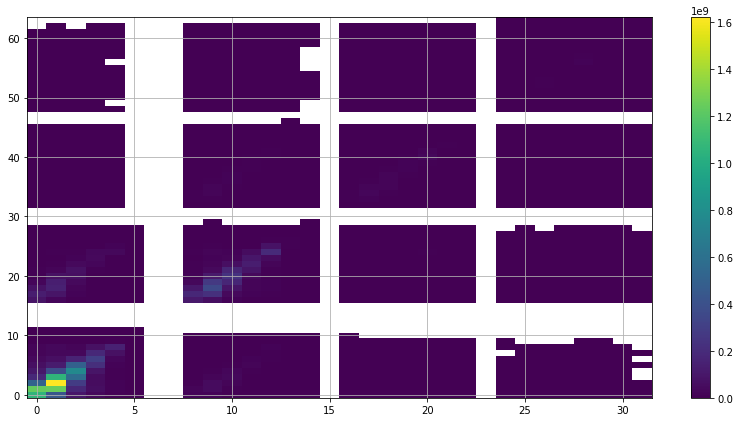

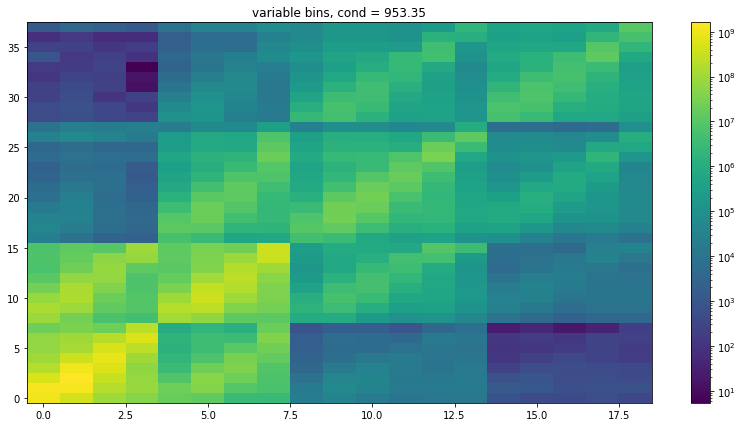

In [5]:
# ---- 3) Apply to your matrix M_np with YOUR edges ----
# Fine grids (match your H):

if groomed:
    pt_edges        = [200, 290, 400, 13000]
    mass_edges_reco = [20,30,40,50,60,70,80,90,100,125,150,175,200,500,13000]
    mass_edges_gen  = [20,40,60,80,100,150,200,13000]
    
    
   

    reco_mass_edges_by_pt = [[20,30,40,50,60,70,80,100,13000], #pt bin 1
                             [20,30,40,50,60,70,80,100,200,13000], #pt bin 2
                             [20,30,40,50,60,70,80,90,100,125,150,175,200,500,13000] #pt bin 3
                            ]

    gen_mass_edges_by_pt = [[20,40,60,80,13000], #pt bin 1
                            [20,40,60,80,100,13000], #pt bin 2
                            [20,30,40,50,60,70,80,100,200,13000] #pt bin 3
                           ]


else:

    pt_edges        = [200, 290, 400, 480,  13000]
    mass_edges_reco =  [ 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 250, 300, 800, 1300]
    mass_edges_gen  = [20, 40, 60, 80, 100, 150, 200, 300, 1300]
    
    reco_mass_edges_by_pt = [[ 20, 30, 40, 50, 60, 70, 80, 100, 1300], #pt bin 1
                             [ 20, 30, 40, 50, 60, 70, 80, 100, 1300], #pt bin 2
                             [ 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150,  200, 1300], #pt bin 3
                             [ 40, 50, 60, 70, 80, 90, 100, 125, 150, 175,  1300]
                            ]

    gen_mass_edges_by_pt = [[20,40,60,80,1300], #pt bin 1
                            [20,40,60,80,1300], #pt bin 2
                            [20,40,60,80,100,150,1300], #pt bin 3
                            [40,60,80,100,150,1300] #pt bin 4
                           ]



# Ensure correct axis order first:
H, perm_used = reorder_to_expected(M_np, mass_edges_reco, pt_edges, mass_edges_gen)
print("Axis permutation used (original->expected):", perm_used)

h2d, perm_used = reorder_to_expected_2d(h2d, mass_edges_reco, pt_edges)
print("Axis permutation used (original->expected):", perm_used)
# Build the unpadded mosaic (no NaNs):
mosaic, blocks = mosaic_no_padding(
    H, mass_edges_reco, mass_edges_gen,
    reco_mass_edges_by_pt, gen_mass_edges_by_pt
)

mosaic_2d = merge_mass_flat(h2d,
                         mass_edges_reco,
                         reco_mass_edges_by_pt)

# ---- 4) Occupancy report: before vs after in each (pT_reco, pT_gen) block ----
n_rp = len(pt_edges) - 1
n_gp = len(pt_edges) - 1
for i in range(n_rp):
    for j in range(n_gp):
        before_block = H[:, i, :, j]
        after_block  = blocks[(i, j)]
        nz_before = np.count_nonzero(before_block)
        nz_after  = np.count_nonzero(after_block)
        print(f"(reco pT {i}, gen pT {j}) nonzero bins: before={nz_before}, after={nz_after}")

# Optional: plot without masking zeros so you can see exactly what's zero

# Before
fig, ax = plt.subplots(figsize=(14, 7))
masked = np.ma.masked_where(M_np_2d <= 0, M_np_2d)
im = ax.imshow(masked, origin="lower", aspect="auto")
#ax.set_title(f"Unpadded mosaic (all-ones)  |  max abs diff = {max_abs_diff:g}")
plt.colorbar(im, ax=ax)
plt.grid()
plt.show()
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(14, 7))
# im = ax.imshow(mosaic, origin="lower", aspect="auto")
# plt.colorbar(im, ax=ax); plt.show()

# If you *do* want to hide zeros, this masks only exact zeros (no NaNs present here):
masked = np.ma.masked_where(mosaic == 0, mosaic)
fig, ax = plt.subplots(figsize=(14, 7))
im = ax.imshow(masked, origin="lower", aspect="auto", norm = 'log')
plt.title(f"variable bins, cond = {np.linalg.cond(mosaic):.2f}")

plt.colorbar(im, ax=ax, ); plt.show()




In [8]:
import ROOT
import numpy as np

# ------------------------------------------------------------------
# 1.  Provide your numpy inputs
# ------------------------------------------------------------------
# resp_np   : 2-D numpy array – rows = reco bins, cols = true(gen) bins
# meas_flat : 1-D numpy array – reco distribution ( *same* row order as resp_np )

# example placeholders – replace with your real arrays
resp_np   = mosaic
meas_flat = mosaic_2d

n_reco, n_true = resp_np.shape
assert len(meas_flat) == n_reco, "measured spectrum must have n_reco bins"

# ------------------------------------------------------------------
# 2.  Build ROOT histograms
# ------------------------------------------------------------------
# Response matrix:  x = truth  (columns),  y = reco  (rows)
h_resp = ROOT.TH2D("resp", "response;truth bin;reco bin",
                   n_true,  0, n_true,
                   n_reco,  0, n_reco)
for i_reco in range(n_reco):
    for j_true in range(n_true):
        h_resp.SetBinContent(j_true + 1, i_reco + 1, resp_np[i_reco, j_true])

# Measured (reco) spectrum
h_meas = ROOT.TH1D("meas", "measured;reco bin;entries", n_reco, 0, n_reco)
for i_reco, val in enumerate(meas_flat, 1):
    h_meas.SetBinContent(i_reco, float(val))

# ------------------------------------------------------------------
# 3.  Run TUnfold
# ------------------------------------------------------------------
unfold = ROOT.TUnfoldDensity(
    h_resp,
    ROOT.TUnfold.kHistMapOutputHoriz  # orientation matches (truth x, reco y)
)

# feed measured spectrum
status = unfold.SetInput(h_meas)
if status >= 10000:
    raise RuntimeError("TUnfold input had overflow/underflow – check your hist.")

# Optional: scan L-curve to choose tau.  Quick-n-dirty: 20 points, auto range
#unfold.ScanSURE(50, 0.000000001, 0.1, )
nPoint, tauMin, tauMax = 30, 1e-6, 1e+0   # coarse example range
g_logTauSURE = ROOT.TGraph()
g_df_chi2A   = ROOT.TGraph()
g_lCurve     = ROOT.TGraph()

tau_sure = unfold.ScanSURE(
    nPoint,
    tauMin,
    tauMax,
    g_logTauSURE,
    g_df_chi2A,
    g_lCurve,
)


# ------------------------------------------------------------------
# 4.  Grab the unfolded spectrum and covariance
# ------------------------------------------------------------------
h_unfold = unfold.GetOutput("unfold")          # TH1D with n_true bins
#cov      = unfold.GetEmatrixInput()            # TH2D covariance of input
#cov_out  = unfold.GetEmatrixOutput("cov_out")  # TH2D covariance of unfolded

# quick printout
h_unfold.Print("all")


TH1.Print Name  = unfold, Entries= 40, Total sum= 9.51769e+09
 fSumw[0]=0, x=-0.5, error=0
 fSumw[1]=2.26916e+09, x=0.5, error=108759
 fSumw[2]=2.93158e+09, x=1.5, error=141135
 fSumw[3]=1.33295e+09, x=2.5, error=92285.9
 fSumw[4]=7.42248e+08, x=3.5, error=53976.9
 fSumw[5]=2.4187e+08, x=4.5, error=65101.3
 fSumw[6]=5.86522e+08, x=5.5, error=96343.2
 fSumw[7]=4.21041e+08, x=6.5, error=67294.8
 fSumw[8]=4.48417e+08, x=7.5, error=42809.8
 fSumw[9]=4.30145e+07, x=8.5, error=31894.9
 fSumw[10]=8.55454e+07, x=9.5, error=56534.2
 fSumw[11]=9.1715e+07, x=10.5, error=46205.9
 fSumw[12]=5.00088e+07, x=11.5, error=28392.7
 fSumw[13]=5.85869e+07, x=12.5, error=19292.2
 fSumw[14]=1.92668e+07, x=13.5, error=9807.18
 fSumw[15]=4.04049e+07, x=14.5, error=25656.6
 fSumw[16]=4.19268e+07, x=15.5, error=36765.1
 fSumw[17]=3.7814e+07, x=16.5, error=24632.6
 fSumw[18]=4.43947e+07, x=17.5, error=14835.8
 fSumw[19]=3.12206e+07, x=18.5, error=8845.64
 fSumw[20]=0, x=19.5, error=0


Warning in <TROOT::Append>: Replacing existing TH1: resp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: meas (Potential memory leak).
Info in <TUnfold::SetConstraint>: fConstraint=1
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 38 input bins and 19 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (xaxis:truth bin[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #20 (xaxis:truth bin[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing xaxis regMode=3 densityMode=3 axisSteering=*[UOB]
Info in <TUnfoldDensity::ScanSURE>: logtau=-6.000000 Chi2A=1806198.905559 SURE=1806236.596465 DF=18.845453 X=6.256766 Y=18.261825
Info in <TUnfoldDensity::InvertMSparseSymmPos>: cholesky-decomposition failed, try eigenvalue analysis
Warning in <TUnfoldDensity::DoUnfold>: rank of output covariance is 3 expect 19
Info in <TUnfoldDensity::ScanSURE>: logtau=0.000

In [11]:
unfold.GetTau()

8.165508384542973e-07

In [12]:
c = ROOT.TCanvas()
h_resp.Draw('colz')
c.Draw()

In [13]:
c = ROOT.TCanvas()
projy = h_resp.ProjectionY()
projy.Draw()
h_meas.Draw('same')
c.Draw()

In [15]:
c = ROOT.TCanvas()
projx = h_resp.ProjectionX()

h_unfold.Draw('same')
projx.Draw('same')
c.Draw()

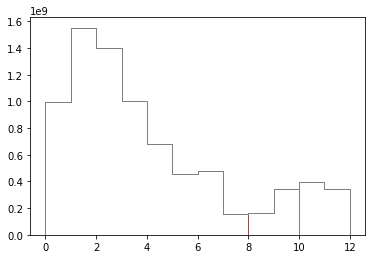

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# helper to move a TH1 into numpy arrays
def th1_to_arrays(h):
    nb = h.GetNbinsX()
    x  = np.arange(1, nb + 1)                           # bin numbers
    y  = np.array([h.GetBinContent(int(i)) for i in x])
    ye = np.array([h.GetBinError(int(i))   for i in x])
    return x, y, ye

x_meas, y_meas, ye_meas = th1_to_arrays(h_meas)
x_unf , y_unf , ye_unf  = th1_to_arrays(h_unfold)

for mass_edges in reco_mass_edges_by_pt:
    n_bin = len(mass_edges) - 1
    for i in range(n_bin):
        plt.stairs(y_meas[0:n_bin])

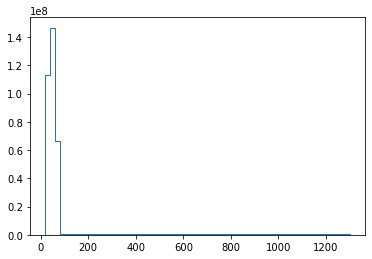

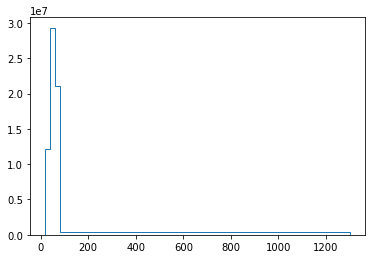

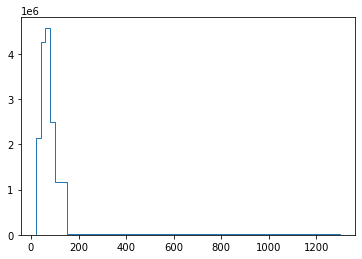

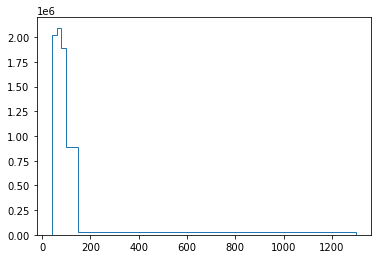

In [27]:
unfolded_pt_binned = unflatten_gen_by_pt(y_unf, gen_mass_edges_by_pt)

for i in range(len(pt_edges)-1):
    bin_widths = np.diff(gen_mass_edges_by_pt[i])
    plt.stairs(unfolded_pt_binned[i]/bin_widths, gen_mass_edges_by_pt[i] )
    plt.show()

array([81.75175403, 79.65092923, 77.63191066, 75.75744032, 74.07831355,
       72.61686137, 71.39168403, 70.40565008, 69.6770287 , 69.17237727,
       68.87665363, 68.82429857, 69.05621274, 69.55701799, 70.33651679,
       71.31993232, 72.41683743, 73.52455004, 74.56504299])

In [43]:
array_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]